Aguja de Buffon

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt



# Introduccion


Para comenzar, este metodo es un tipo de implementacion del metodo de Monte carlos donde se rellena un area con una distribucion uniforme y se cuentan cuantos puntos estan en una cierta region o cumplen una cierta propiedad.Para ello, simulo el experimento de  Buffon, creando a partir de numeros random las agujas. Estas las simulamos con dos variables aleatorias, la variable x es el centro de la agujita  $x \in (0,\frac{d}{2})$ (supongo que el renglon com ancho d) y la variable $\theta$ se define a partir de la perpendicular al renglon. $\theta \in (0,\frac{\pi}{2})$
para encontrar la distribucion de probabilidad de cada una, como son variables uniformes, e independientes la funcion densidad de probabilidad es la multiplicacion de la distribucion densidad de probabilidad de cada una. En el caso de la variables aleatoria $x$, la funcion es $f(x)=\frac{2}{d}$ y para $g(\theta)=\frac{2}{\pi}$. La funcion distribucion de probabilidad de ambas es: $F(x,\theta)= \frac{4}{d\cdot \pi}$.
Si ahora queremos saber cual es la probabilidad que toque el renglon. tenemos que usar trigonometria, dejo libre $\theta$. Entonces si L es el largo de la aguja (no se distingue la cabecilla de la aguja, es simetrica desde su centro por eso el $\theta \in (0,\frac{\pi}{2}$) es la condicion que dado un cierto $\theta$ que x es el que se necesita para que toque un renglon, esto es $x \in (0, \frac{L}{2} \cdot sin(\theta) ) $ defino la funcion G de probabilidad que toque una raya $==>$

$$G_{toca} = \int_{0}^{\frac{\pi}{2}} \int_{0}^{{\frac{L}{2}} \cdot sin(\theta)} \frac{4}{d \cdot \pi}\,{\text{d}}x \,{\text{d}}\theta 
=\left. \frac{4 \cdot x}{d \cdot \pi}  \right |_{0}^{{\frac{L}{2}} \cdot sin(\theta)} \,{\text{d}}\theta 
= \int_{0}^{\frac{\pi}{2}} \frac{4 \cdot {{\frac{L}{2}} \cdot sin(\theta)}}{d \cdot \pi} \,{\text{d}}\theta 
= \left. \frac{-2 \cdot {L \cdot cos(\theta)}}{d \cdot \pi} \right|_{0}^{{\frac{\pi}{2}}} 
= \frac{-2 \cdot {L \cdot [cos(\frac{\pi}{2})-cos(0)]}}{d \cdot \pi} $$

$$= \frac{-2 \cdot {L \cdot [-1]}}{d \cdot \pi}= \frac{2 \cdot {L}}{d \cdot \pi}$$

si $L=d$ entonces

$$G_{toca}=\frac{2}{\pi}$$

Si hacemos la siguiente cuenta, donde ${T_{total}}$ es la cantidad total de agujas sobre la cantidad total de agujas que tocan $N_{toca}$ (igual a $G$) 

$$\frac{T_{total}}{G_{toca}}=\frac{N_{total}}{N_{toca}}=\frac{\pi}{2}$$
pasando el 2 al otro miembro nos queda una manera de estimar el valor de $\pi$ 
$$ 2 \cdot \frac{N_{total}}{N_{toca}} = \pi$$

In [2]:
def agujas(N,d):
    theta=np.random.random(N)*(math.pi/2)
    x=np.random.random(N)*(1/2*d)
    return(x,theta)


In [3]:
x,th=agujas(100000,1)

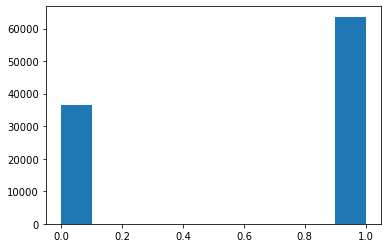

In [4]:
def toque(x,th,L):
    #largo de la aguja L, la mitad es L/2, una ves que formo el triangulo para theta mayor a eso seguro toca el renglon. th0 va de 0 a pi
    experimento=[]
    j=0
    for i in range(len(x)):
        th0=math.asin(x[i]*2/L)
        if (th[i]>=th0):
            experimento.append(1)
            j=j+1
        else:
            experimento.append(0)
    return(experimento,j)

A,J=toque(x,th,1)
PII=(len(A)*2)/J

plt.hist(A);

In [5]:
PII

3.1432208584136165

# Conclusion

Este tipo de metodos son conocido como Monte Carlos y permite obtener estimaciones de la probabilidad a partir de llenar una caja de puntos y ver cuantos caen dentro de un area de interes y cuantos afuera. En este caso, lleno la hoja rayada de agujas y puedo ver cuantas quedan tocando una raya. se encuentra una muy buena estimacion del numero $\pi$ hasta dos cifras decimales correctas.